# Australian GDP Analysis  - By Industry

With news that Australia's GDP has grown greater than expectations, I wanted to find which industries were contributing the most to this growth.

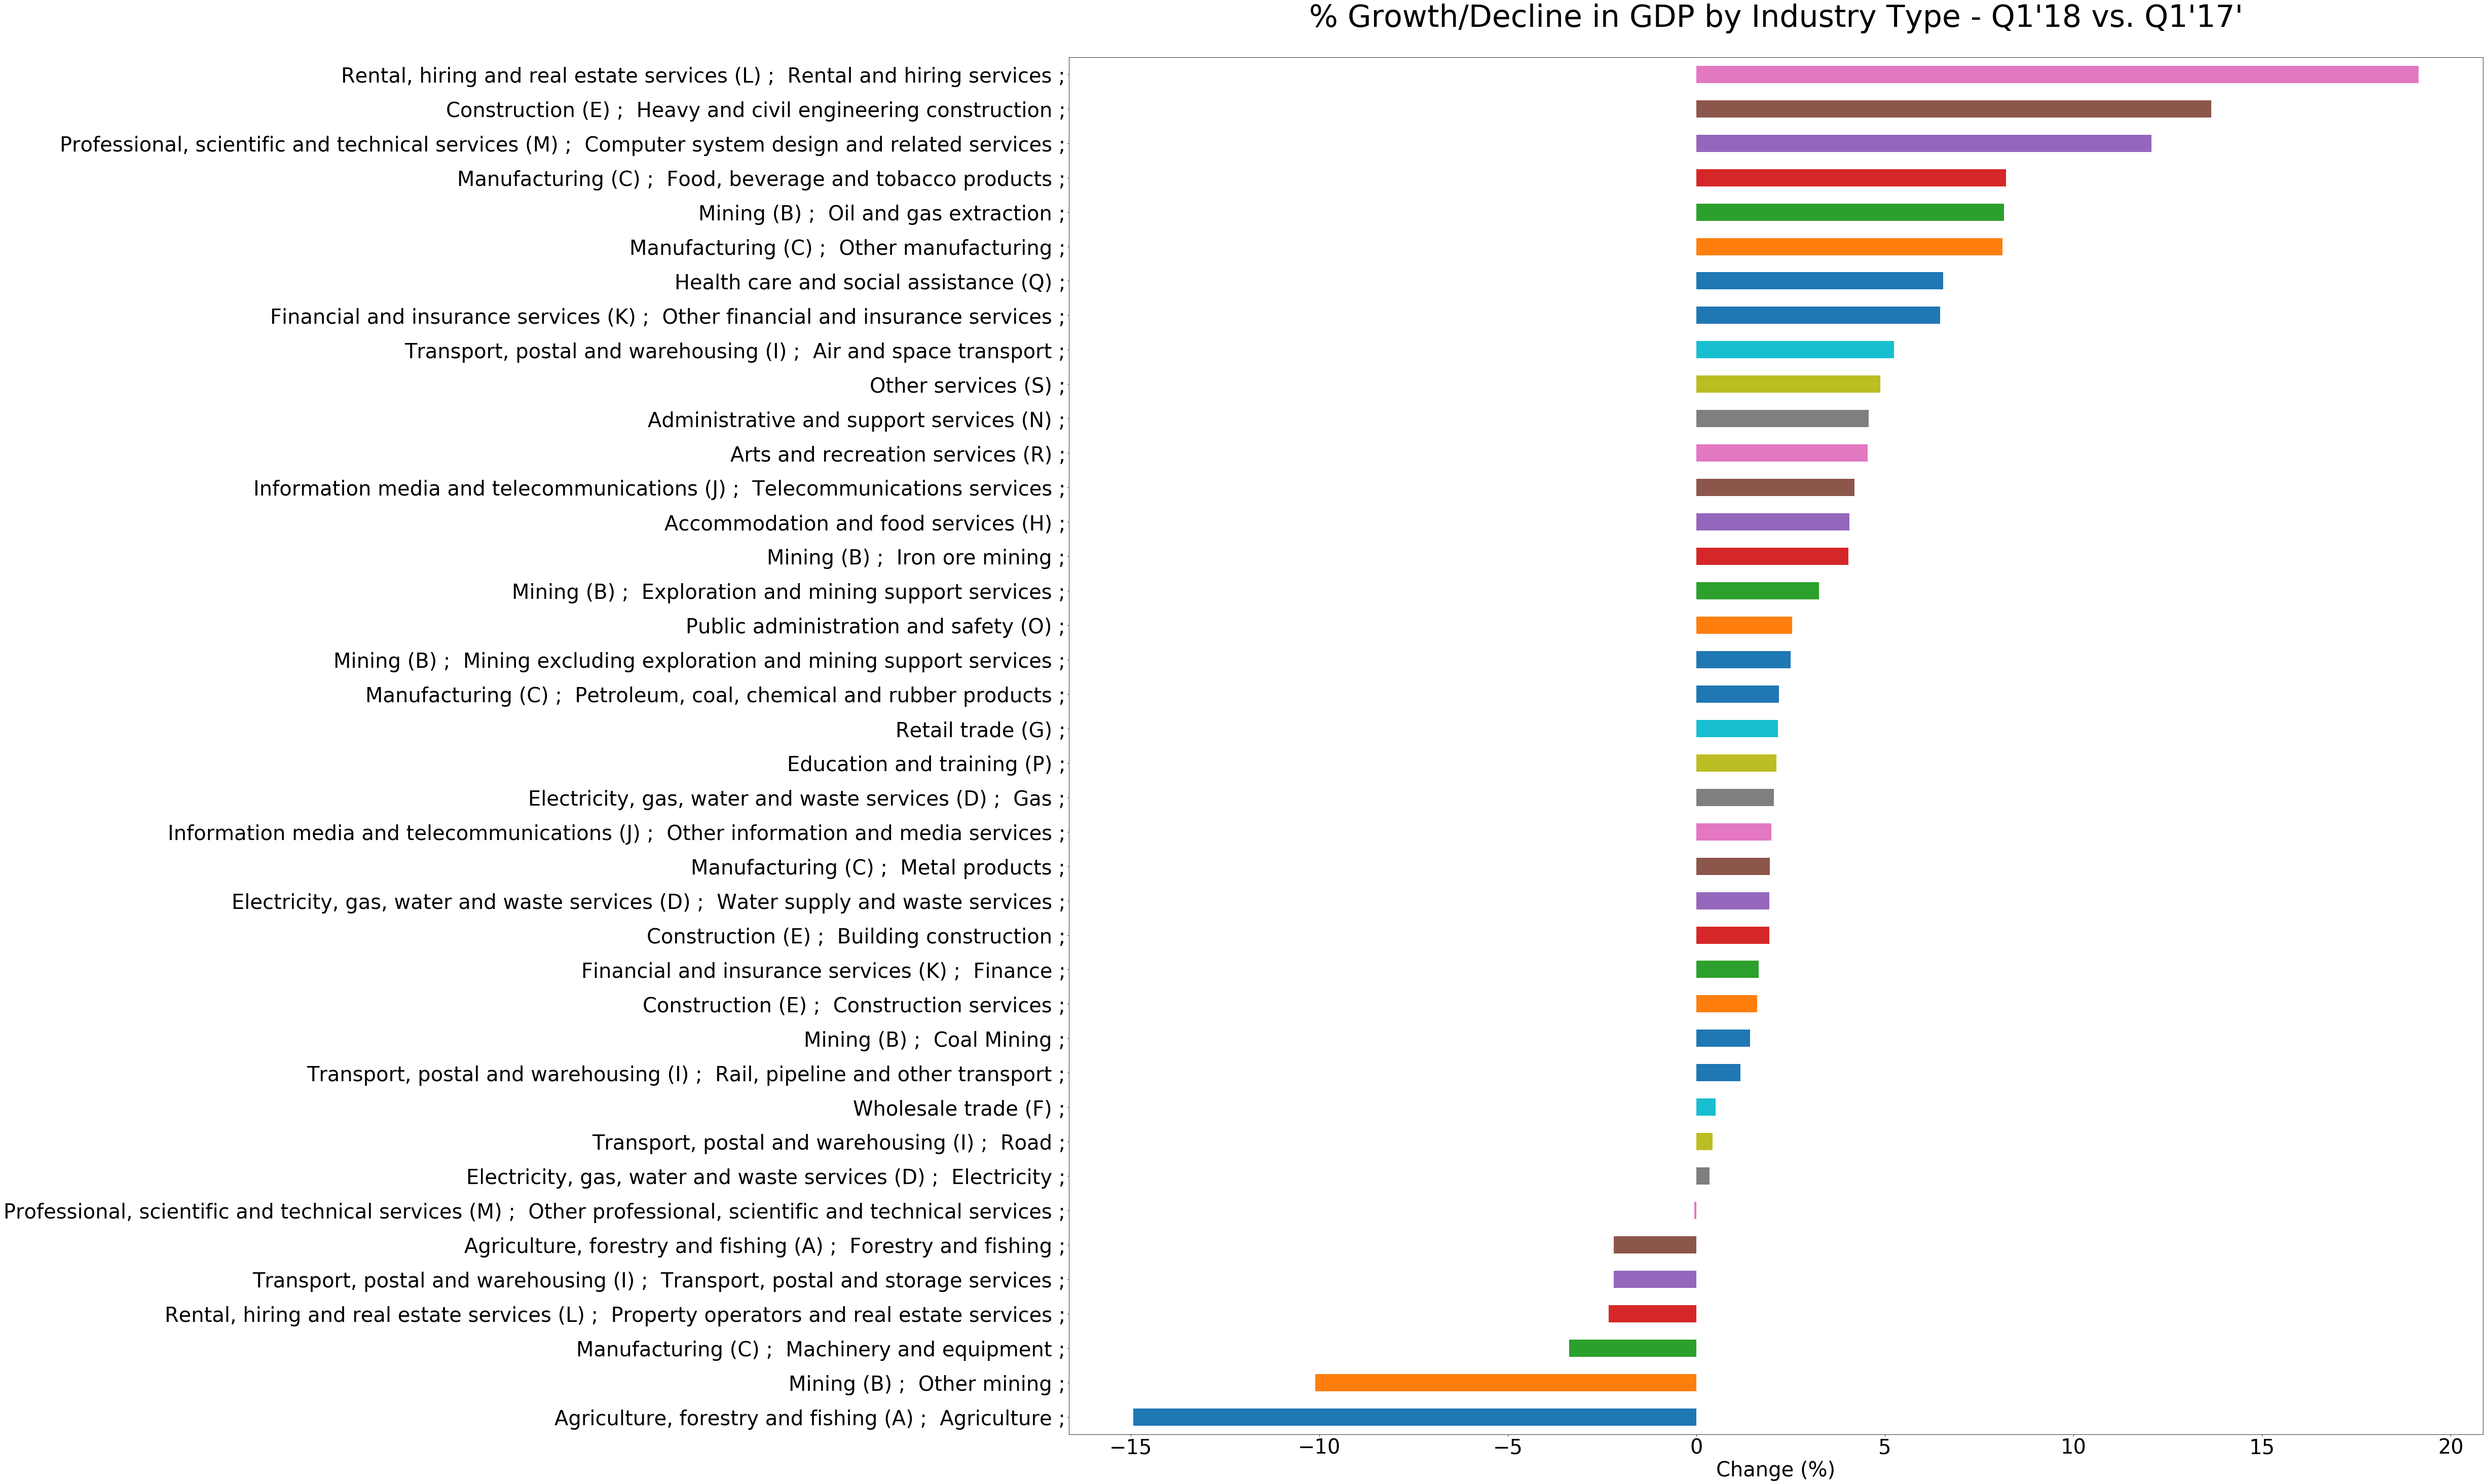

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
%matplotlib inline

#Downloaded file from http://www.abs.gov.au/AUSSTATS/abs@.nsf/DetailsPage/5206.0Mar%202018?OpenDocument
df = pd.read_excel("5206006_industry_gva.xlsx", sheet_name='Data1')
df.index.name = "Date"

#I identified 'sub total' lines and wanted to exclude them, so created a new file with the columns I wanted

keep_columns = pd.read_excel("ColumnsToKeep.xlsx")
keep_columns = keep_columns['Columns'].values.tolist()

#I will probably use this list again, as I can easily filter for the columns I want

AustralianGDP = df[keep_columns]
AustralianGDP = AustralianGDP.iloc[239:].T

#Create a new column... Q1-2018 vs. Q1-2017 change between industries defined by ABS  

AustralianGDP['% Change'] = AustralianGDP.apply(lambda row: (row['2018-03-01 00:00:00']/row['2017-03-01 00:00:00']- 1)*100, axis=1)
AustralianGDP.sort_values('% Change', ascending=True, inplace=True)
AustralianGDP

plt.figure(figsize=(50,50))
plt.title("% Growth/Decline in GDP by Industry Type - Q1'18 vs. Q1'17'", size = 60, y=1.02)
plt.yticks(size = 40)
plt.xticks(size = 40)
plt.xlabel('Change (%)', size = 40)
AustralianGDP['% Change'].plot(kind='barh', stacked=False)



Splitting out the industries by its components probably shows too much detail to create a clear insight. However, I am suprised by the 'mix' that comprises an 'industry'.

For example within the industry __Construction__, there is large growth in _Heavy and civil engineering construction_ which refers to large projects such as the construction of railways or harbour/river works. But _Building Construction_ has a lot lower growth which relates to residential or non-residential building construction. 

The industry __Rental hiring and real estate services__ - is split between _Rental and hiring services_ and _property operators & real estate service_ the former refers to renting out cars, machinery and patents etc. and is showing the highest growth on the chart. While the latter is in decline and references the real estate industry.

You can always dig a little deeper to find what the drivers are for the Australian economy...